<a href="https://colab.research.google.com/github/ducnguyen1704/Pandas/blob/master/BaiTap_GDPList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Bài tập] Phân tích trên bộ dữ liệu GPD List

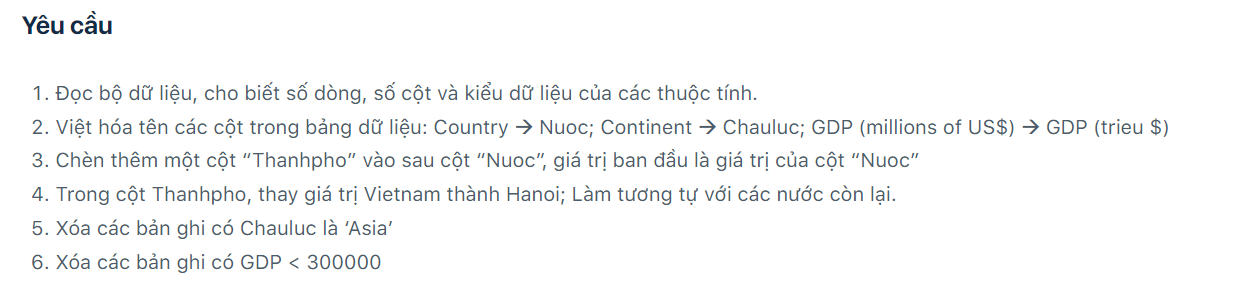

1. Đọc dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của thuộc tính

In [120]:
import pandas as pd
import numpy as np

In [121]:
df = pd.read_csv('/content/drive/MyDrive/PhanTichDuLieu_CodeGym/Tuan02/data/GDPlist.csv', encoding= 'unicode_escape', index_col=False)
df.head(10)

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
5,Australia,Oceania,1488221
6,Austria,Europe,419243
7,Azerbaijan,Europe,62321
8,Bahrain,Asia,26108
9,Bangladesh,Asia,113032


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


- Bộ dữ liệu có 3 cột là Country, continent và GDP với 125 dòng
- GDP có kiểu dữ liệu là số, 2 cột còn lại kiểu chuỗi


In [123]:
#Đổi tên
df=df.rename(columns = {'GDP (millions of US$)':'GDP (Triệu $)','Country':'Nuoc','Continent':'ChauLuc'})
df.head()

,Nuoc,ChauLuc,GDP (Triệu $)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [124]:
# Chèn thêm một cột “Thanhpho” vào sau cột “Nuoc”, giá trị ban đầu là giá trị của cột “Nuoc”   
# Thêm một cột mới với giá trị trung bình cột price
df['ThanhPho'] = df.loc[:,'Nuoc']
df.head()

,Nuoc,ChauLuc,GDP (Triệu $),ThanhPho
0,Afghanistan,Asia,18181,Afghanistan
1,Albania,Europe,12847,Albania
2,Algeria,Africa,190709,Algeria
3,Angola,Africa,100948,Angola
4,Argentina,South America,447644,Argentina


In [125]:
# Trong cột Thanhpho, thay giá trị Vietnam thành Hanoi; Làm tương tự với các nước còn lại.
df['ThanhPho'].replace('Vietnam','Hanoi',inplace = True)
df.tail(10)

,Nuoc,ChauLuc,GDP (Triệu $),ThanhPho
115,Ukraine,Europe,164960,Ukraine
116,United Arab Emirates,Asia,360136,United Arab Emirates
117,United Kingdom,Europe,2417570,United Kingdom
118,United States,North America,15094025,United States
119,Uruguay,South America,46872,Uruguay
120,Uzbekistan,Asia,45353,Uzbekistan
121,Venezuela,South America,315841,Venezuela
122,Vietnam,Asia,122722,Vietnam
123,Yemen,Africa,33675,Yemen
124,Zambia,Africa,19206,Zambia


In [126]:
#Thay giá trị Việt Nam thành Hà Nội
df['ThanhPho'].iloc[122] = 'Hanoi'
df.tail(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Nuoc,ChauLuc,GDP (Triệu $),ThanhPho
115,Ukraine,Europe,164960,Ukraine
116,United Arab Emirates,Asia,360136,United Arab Emirates
117,United Kingdom,Europe,2417570,United Kingdom
118,United States,North America,15094025,United States
119,Uruguay,South America,46872,Uruguay
120,Uzbekistan,Asia,45353,Uzbekistan
121,Venezuela,South America,315841,Venezuela
122,Vietnam,Asia,122722,Hanoi
123,Yemen,Africa,33675,Yemen
124,Zambia,Africa,19206,Zambia


In [127]:
# Xóa các bản ghi có Chauluc là ‘Asia’
df = df.drop(df[df.ChauLuc  == 'Asia'].index)
df

,Nuoc,ChauLuc,GDP (Triệu $),ThanhPho
1,Albania,Europe,12847,Albania
2,Algeria,Africa,190709,Algeria
3,Angola,Africa,100948,Angola
4,Argentina,South America,447644,Argentina
5,Australia,Oceania,1488221,Australia
...,...,...,...,...
118,United States,North America,15094025,United States
119,Uruguay,South America,46872,Uruguay
121,Venezuela,South America,315841,Venezuela
123,Yemen,Africa,33675,Yemen


In [128]:
#Cách 2
# Hiển thị những cột có châu lục Khác Asia
df = df.loc[df['ChauLuc'] != 'Asia']
df

,Nuoc,ChauLuc,GDP (Triệu $),ThanhPho
1,Albania,Europe,12847,Albania
2,Algeria,Africa,190709,Algeria
3,Angola,Africa,100948,Angola
4,Argentina,South America,447644,Argentina
5,Australia,Oceania,1488221,Australia
...,...,...,...,...
118,United States,North America,15094025,United States
119,Uruguay,South America,46872,Uruguay
121,Venezuela,South America,315841,Venezuela
123,Yemen,Africa,33675,Yemen


In [119]:
# Cách 1
# Xóa các bản ghi có GDP < 300000
df = df.drop(df[df['GDP (Triệu $)'] < 300000].index)
df

,Nuoc,ChauLuc,GDP (Triệu $),ThanhPho
4,Argentina,South America,447644,Argentina
5,Australia,Oceania,1488221,Australia
6,Austria,Europe,419243,Austria
11,Belgium,Europe,513396,Belgium
15,Brazil,South America,2492908,Brazil
21,Canada,North America,1736869,Canada
24,Colombia,South America,328422,Colombia
32,Denmark,Europe,333238,Denmark
41,France,Europe,2776324,France
44,Germany,Europe,3577031,Germany


In [109]:
df.shape[0]

23

In [130]:
# Cách 2: # Xóa các bản ghi có GDP < 300000
df = df.drop(df.loc[df['GDP (Triệu $)']  < 300000].index)
df

,Nuoc,ChauLuc,GDP (Triệu $),ThanhPho
4,Argentina,South America,447644,Argentina
5,Australia,Oceania,1488221,Australia
6,Austria,Europe,419243,Austria
11,Belgium,Europe,513396,Belgium
15,Brazil,South America,2492908,Brazil
21,Canada,North America,1736869,Canada
24,Colombia,South America,328422,Colombia
32,Denmark,Europe,333238,Denmark
41,France,Europe,2776324,France
44,Germany,Europe,3577031,Germany
